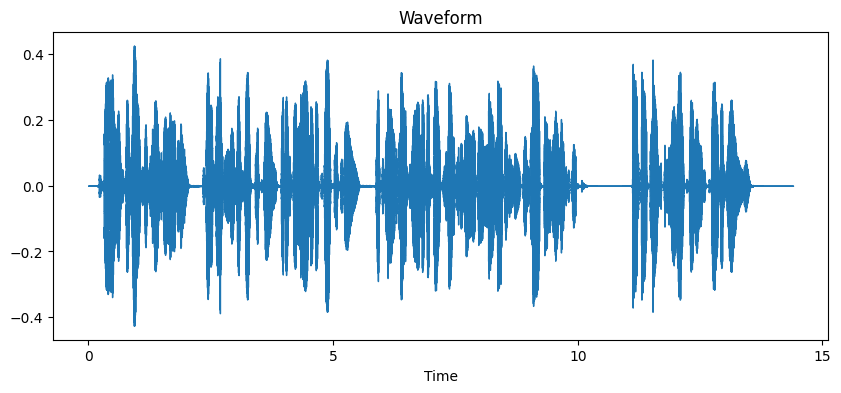

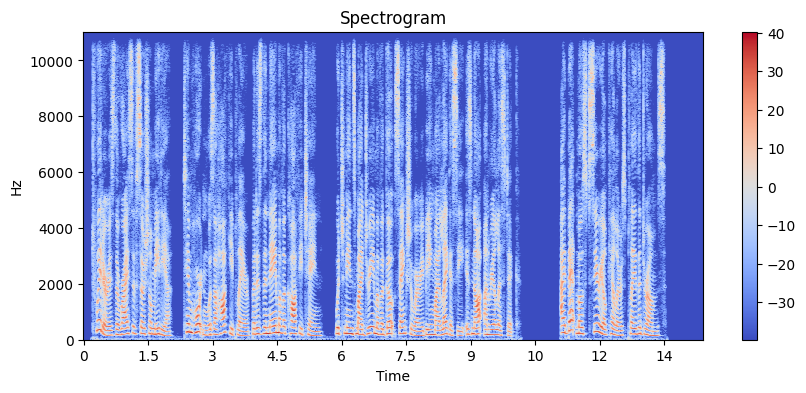

In [3]:
# Display waveform and spectrogram of the audio file

import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('voice.mp3')
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()

# Spectrogram
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram')
plt.show()


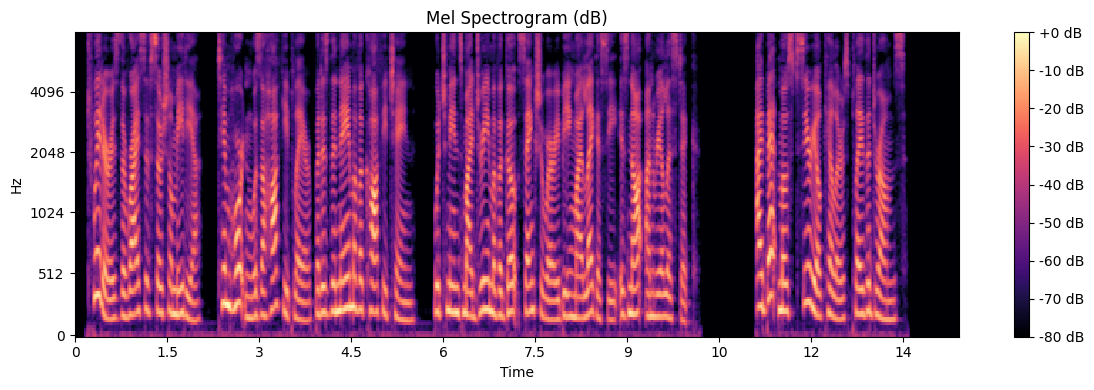

In [5]:
# Compute Mel Spectrogram

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio
y, sr = librosa.load('voice.mp3')

# Compute Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to Decibel scale
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot it
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format="%+2.0f dB")
plt.title('Mel Spectrogram (dB)')
plt.tight_layout()
plt.show()


In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

# Load audio
y, sr = librosa.load('voice.mp3')

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs = torch.tensor(mfccs.T, dtype=torch.float32).unsqueeze(0)  # [1, time, features]

labels = ["the", "of", "is", "play", "my", "but", "bet"]

# Traditional RNN model
class TraditionalRNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.GRU(input_size=13, hidden_size=32, batch_first=True)
        self.fc = nn.Linear(32, len(labels))  # match the number of labels

    def forward(self, x):
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])  # Use last time step

# Run model
model = TraditionalRNN()
output = model(mfccs)

# Convert logits to probabilities
probs = F.softmax(output, dim=1).detach().numpy().flatten()

# Find predicted label
predicted_idx = np.argmax(probs)
predicted_label = labels[predicted_idx]

# Print readable output
print("Probabilities:")
for i, label in enumerate(labels):
    print(f"{label:>10}: {probs[i]:.4f}")

print(f"\n Predicted label: **{predicted_label.upper()}**")


Probabilities:
       the: 0.1088
        of: 0.3102
        is: 0.2300
      play: 0.1199
        my: 0.0737
       but: 0.0871
       bet: 0.0703

 Predicted label: **OF**


In [7]:
# Whisper: End-to-end speech recognition

from transformers import pipeline

# Load Whisper model
asr = pipeline("automatic-speech-recognition", model="openai/whisper-small")

# Run inference on audio
result = asr("voice.mp3")

# Print the transcription
print("Whisper Transcription:", result['text'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

preprocessor_config.json: 0.00B [00:00, ?B/s]

Device set to use cpu
`return_token_timestamps` is deprecated for WhisperFeatureExtractor and will be removed in Transformers v5. Use `return_attention_mask` instead, as the number of frames can be inferred from it.
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


Whisper Transcription:  Twitter is the rice of social media. Tim Horton was a hockey player but is the name of a coffee chain, which means my dream of a goat sanctuary being my legacy is not unrealistic. I bet most serial killers play the drums.
